In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#küme 1

x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)

#küme 2

x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

#küme 3

x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

x = np.concatenate((x1,x2,x3),axis=0)
y = np.concatenate((y1,y2,y3),axis=0)

dictionary = {"x":x,"y":y}
data = pd.DataFrame(dictionary)

data.head()

,x,y
0,23.008931,19.114131
1,26.978668,27.425603
2,26.352913,35.363643
3,22.301611,23.532570
4,21.146245,30.416739


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3000 non-null   float64
 1   y       3000 non-null   float64
dtypes: float64(2)
memory usage: 47.0 KB


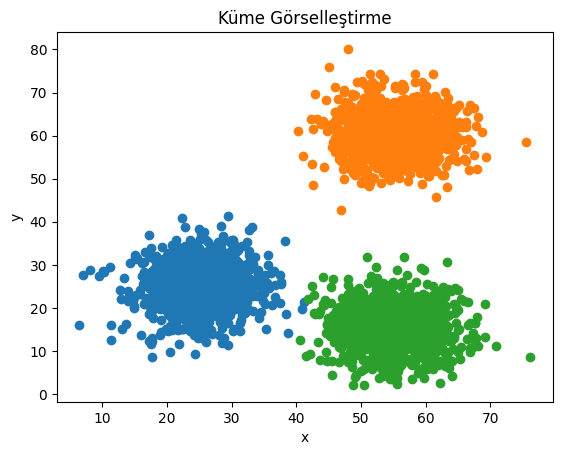

In [3]:
plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Küme Görselleştirme")
plt.show()

C:\Users\alper\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alper\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alper\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

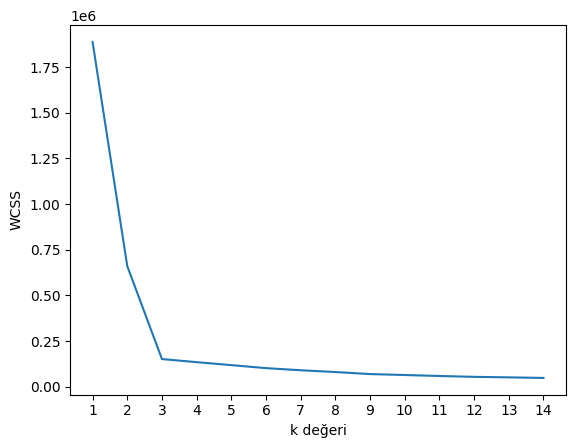

In [4]:
#k değeri belirleme
#k değerini seçmek için elbow metodu kullanılır

from sklearn.cluster import KMeans
wcss= []

for k in range(1,15):
    KMeans_model = KMeans(n_clusters=k)
    KMeans_model.fit(data)
    wcss.append(KMeans_model.inertia_)

plt.figure()
plt.plot(range(1,15),wcss)
plt.xticks(range(1,15))
plt.xlabel("k değeri")
plt.ylabel("WCSS")
plt.show()

C:\Users\alper\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


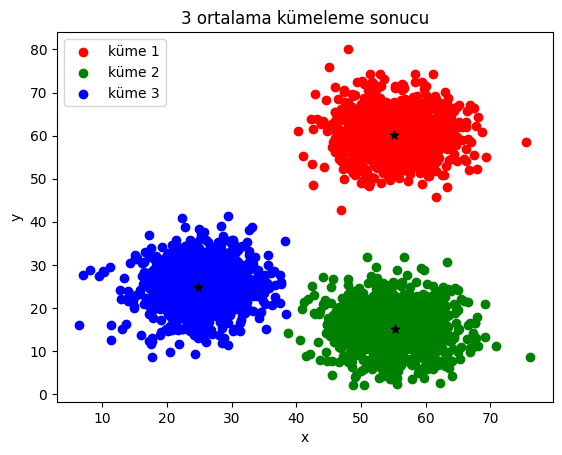

In [5]:
#k = 3 seçilir

KMeans_model = KMeans(n_clusters=3)
clusters = KMeans_model.fit_predict(data)

data["label"] = clusters

plt.figure()
plt.scatter(data.x[data.label == 0],data.y[data.label == 0],color="red",label="küme 1")
plt.scatter(data.x[data.label == 1],data.y[data.label == 1],color="green",label="küme 2")
plt.scatter(data.x[data.label == 2],data.y[data.label == 2],color="blue",   label="küme 3")
plt.legend()
plt.scatter(KMeans_model.cluster_centers_[:,0],KMeans_model.cluster_centers_[:,1],color="black",marker="*")
plt.xlabel("x")
plt.ylabel("y")
plt.title("3 ortalama kümeleme sonucu")
plt.show()

### Hiyerarşik Kümeleme

In [6]:
#Creating a new dataset

#array 1
x1 = np.random.normal(25,5,50)
y1 = np.random.normal(25,5,50)

#array 2
x2 = np.random.normal(55,5,50)
y2 = np.random.normal(60,5,50)

#array 3
x3 = np.random.normal(55,5,50)
y3 = np.random.normal(15,5,50)

x = np.concatenate((x1,x2,x3),axis=0)
y = np.concatenate((y1,y2,y3),axis=0)

dictionary = {"x":x,"y":y}

dt = pd.DataFrame(dictionary)
dt.head()

,x,y
0,28.961015,23.008634
1,25.767590,15.233456
2,25.828069,29.756405
3,17.244387,15.604822
4,22.099198,24.503794


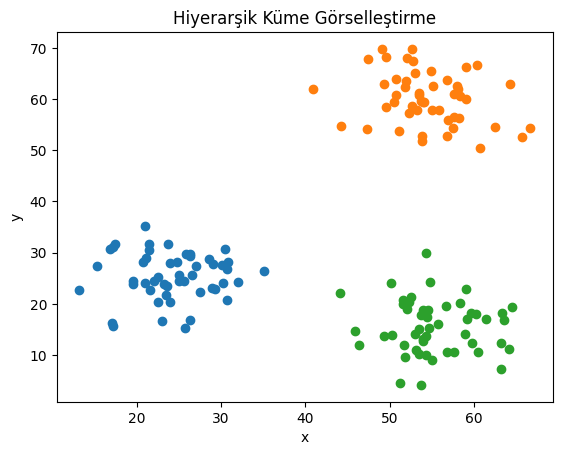

In [7]:
plt.figure()
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Hiyerarşik Küme Görselleştirme")
plt.show()

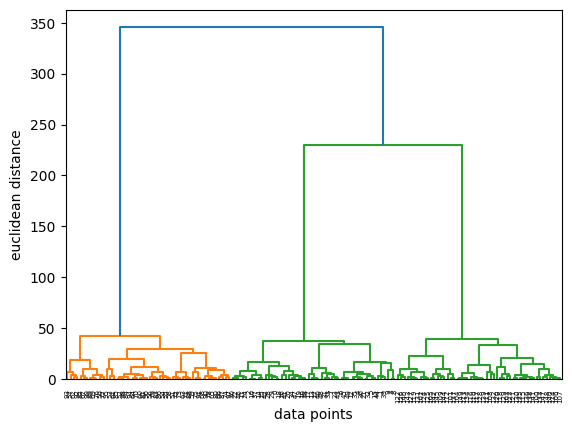

In [8]:
#dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram #dendrogram fonksiyonu

def plot_dendrogram(data):
    """
    Plots a dendrogram for hierarchical clustering.

    Parameters:
    - data: The input data for clustering.

    Returns:
    None
    """
    merg = linkage(data, method="ward")
    dendrogram(merg, leaf_rotation=90)
    plt.xlabel("data points")
    plt.ylabel("euclidean distance")
    plt.show()

plot_dendrogram(dt)

C:\Users\alper\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


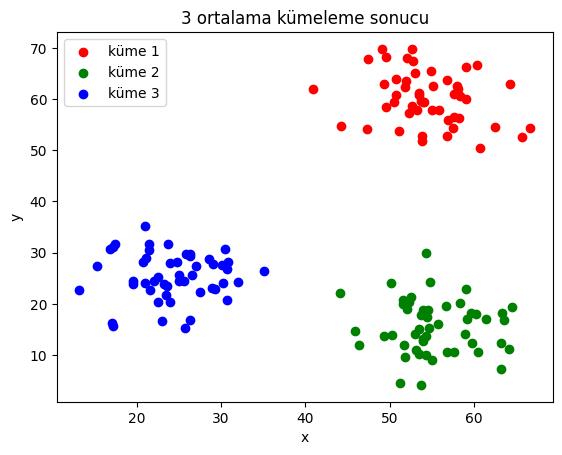

In [9]:
#hiyerarşik kümeleme modeli

from sklearn.cluster import AgglomerativeClustering #hiyerarşik kümeleme modeli
hiyerarşik_model = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward") #ward metodu kullanılır  (minimize the variance of the clusters being merged)
clusters = hiyerarşik_model.fit_predict(dt)

dt["label"] = clusters

plt.figure()
plt.scatter(dt.x[dt.label == 0],dt.y[dt.label == 0],color="red",label="küme 1")  #küme 1
plt.scatter(dt.x[dt.label == 1],dt.y[dt.label == 1],color="green",label="küme 2") #küme 2
plt.scatter(dt.x[dt.label == 2],dt.y[dt.label == 2],color="blue",label="küme 3")  #küme 3
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("3 ortalama kümeleme sonucu")
plt.show()